In [ ]:
!unzip /GurNum-20230430T171817Z-001.zip

In [27]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import os
import cv2
from keras.layers import Dense, Flatten

# Define the paths to your image folders
train_path = "/content/GurNum"
val_path = "/content/GurNum"

In [28]:
# Set the path to the folder containing the 'train' folder
data_dir = train_path
# Set the image size
img_size = (32, 32)
# Create empty lists for the images and labels
images = []
labels = []
# Loop over each folder from '0' to '9'
for label in range(10):
    folder_path = os.path.join(data_dir, 'train', str(label))
 # Loop over each image in the folder
    for file in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file)
        if file_path.endswith(('.tiff','.bmp')):
 # Load the image and resize it to the desired size
           img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
           img = cv2.resize(img, img_size)
 # Append the image and label to the lists
           images.append(img)
           labels.append(label)

In [29]:
# Convert the lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)
# Save the arrays in NumPy format
np.save('x_train.npy', images)
np.save('y_train.npy', labels)

In [32]:
# Set the path to the folder containing the 'val' folder
data_dir_val = val_path
# Set the image size
img_size_val = (32, 32)
# Create empty lists for the images and labels
images_val = []
labels_val = []
# Loop over each folder from '0' to '9'
for label in range(10):
 folder_path = os.path.join(data_dir_val, 'val', str(label))

 # Loop over each image in the folder
 for file in os.listdir(folder_path):
  file_path = os.path.join(folder_path, file)
  if file_path.endswith(('.tiff','.bmp')):
 # Load the image and resize it to the desired size
     img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
     img = cv2.resize(img, img_size_val)
 # Append the image and label to the lists
     images_val.append(img)
     labels_val.append(label)
# Convert the lists to NumPy arrays
images_val = np.array(images_val)
labels_val = np.array(labels_val)
# Save the arrays in NumPy format
np.save('x_test.npy', images_val)
np.save('y_test.npy', labels_val)

# Load the dataset
x_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
x_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')


1000
178
(1000, 32, 32)
(178, 32, 32)


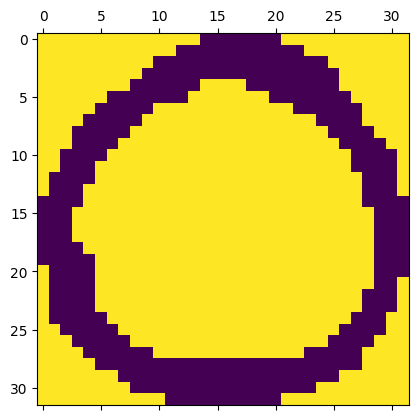

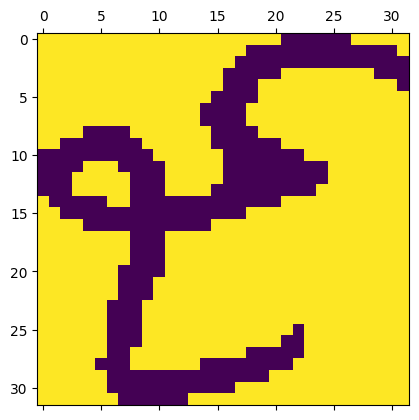

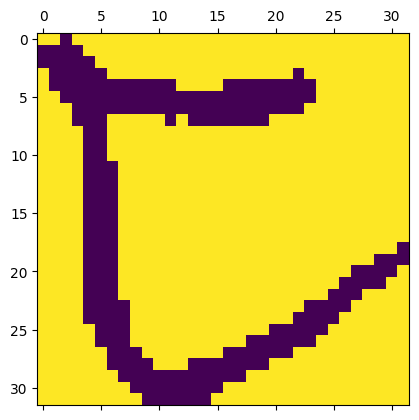

In [33]:
# test the images are loaded correctly
print(len(x_train))
print(len(x_test))
x_train[0].shape
x_train[0]
plt.matshow(x_train[0])
plt.matshow(x_train[999])
print(x_train.shape)
print(x_test.shape)
y_train
y_test
plt.matshow(x_test[150])

In [34]:
# # flatten the dataset i.e, change 2D to 1D (skipped this , and flattened in the model)
# x_train_flat = x_train.reshape(len(x_train),32*32)
# x_test_flat = x_test.reshape(len(x_test),32*32)
# print(x_train_flat.shape)
# print(x_test_flat.shape)
# x_train_flat[0]

# creating a simple nn
# create a dense layer where every input is connected to every other output, the number of inputs are 1000, outputs are 10
# activation function is sigmoid
model = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(10, input_shape=(1024,),activation = 'sigmoid')
])
# compile the nn
model.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
# some 10 iterations done here
model.fit(x_train, y_train,epochs= 10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 [==============================] - 1s 7ms/step - loss: 165.4478 - accuracy: 0.3570 - val_loss: 63.9815 - val_accuracy: 0.5843
Epoch 2/10
32/32 [==============================] - 0s 2ms/step - loss: 30.1357 - accuracy: 0.7710 - val_loss: 39.3589 - val_accuracy: 0.6798
Epoch 3/10
32/32 [==============================] - 0s 2ms/step - loss: 17.0009 - accuracy: 0.8590 - val_loss: 24.5691 - val_accuracy: 0.7921
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 8.4833 - accuracy: 0.9130 - val_loss: 25.3868 - val_accuracy: 0.8090
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 7.2387 - accuracy: 0.9210 - val_loss: 20.7185 - val_accuracy: 0.8539
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 3.6462 - accuracy: 0.9480 - val_loss: 18.5050 - val_accuracy: 0.8708
Epoch 7/10
32/32 [==============================] - 0s 2ms/step - loss: 3.2810 - accuracy: 0.9550 - val_loss: 16.7939 - val_accuracy: 0.8596
Epoch 8/1

In [35]:
# Observation : we see a better accuracy from the 2nd iteration
# now scale and try to check the accuracy, divide dataset by 255
x_train_scaled = x_train/255
x_test_scaled = x_test/255
model.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))


Epoch 1/10
32/32 [==============================] - 0s 6ms/step - loss: 0.7637 - accuracy: 0.9550 - val_loss: 0.9758 - val_accuracy: 0.8652
Epoch 2/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7523 - accuracy: 0.9640 - val_loss: 0.9485 - val_accuracy: 0.9045
Epoch 3/10
32/32 [==============================] - 0s 3ms/step - loss: 0.7309 - accuracy: 0.9830 - val_loss: 0.9306 - val_accuracy: 0.9157
Epoch 4/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7165 - accuracy: 0.9910 - val_loss: 0.9174 - val_accuracy: 0.9213
Epoch 5/10
32/32 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.9940 - val_loss: 0.9084 - val_accuracy: 0.9213
Epoch 6/10
32/32 [==============================] - 0s 2ms/step - loss: 0.6971 - accuracy: 0.9950 - val_loss: 0.9005 - val_accuracy: 0.9157
Epoch 7/10
32/32 [==============================] - 0s 3ms/step - loss: 0.6894 - accuracy: 0.9950 - val_loss: 0.8940 - val_accuracy: 0.9045
Epoch 8/10
32/32 [==

In [36]:

# Observation : we got better result for all iterations on scaling the training dataset
# evaluate test dataset
model.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.8759 - accuracy: 0.9213


[0.8758898973464966, 0.9213483333587646]

6/6 [==============================] - 0s 2ms/step
Predicted Value is  0
Predicted Value is  5
Predicted Value is  9


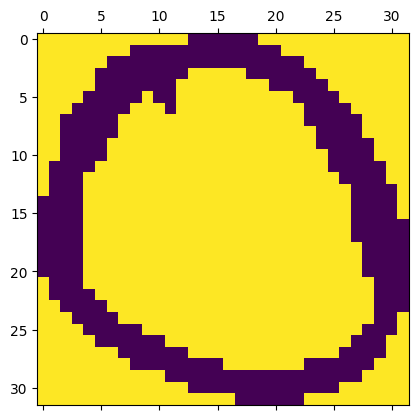

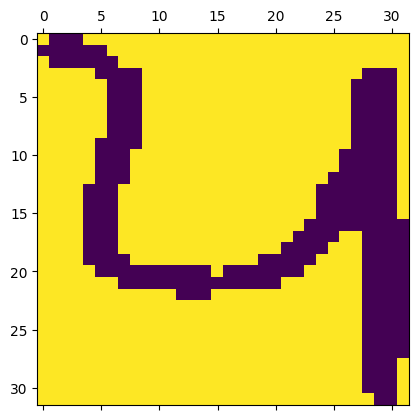

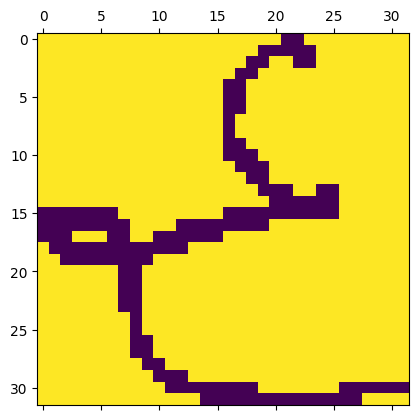

In [37]:
# Observation : result almost same as the training dataset,
# predict 1st image
plt.matshow(x_test[0])
y_predicted = model.predict(x_test_scaled)
y_predicted[0]
# this showing the 10 results for the input '0', we need to look for the value which is max
print('Predicted Value is ',np.argmax(y_predicted[0]))
# test some more values
plt.matshow(x_test[88])
print('Predicted Value is ',np.argmax(y_predicted[88]))
plt.matshow(x_test[177])
print('Predicted Value is ',np.argmax(y_predicted[177]))

In [38]:
# some predictions may not be not right
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

[0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 7, 7, 1, 1, 1, 1, 2, 9, 4, 2, 2, 2, 2, 2, 2, 2, 2, 5, 9, 2, 5, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 1, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[17,  0,  0,  0,  0,  0,  0,  0,  0,  1],
       [ 0, 12,  0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0, 12,  0,  1,  2,  0,  0,  0,  2],
       [ 0,  0,  0, 16,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0, 17,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

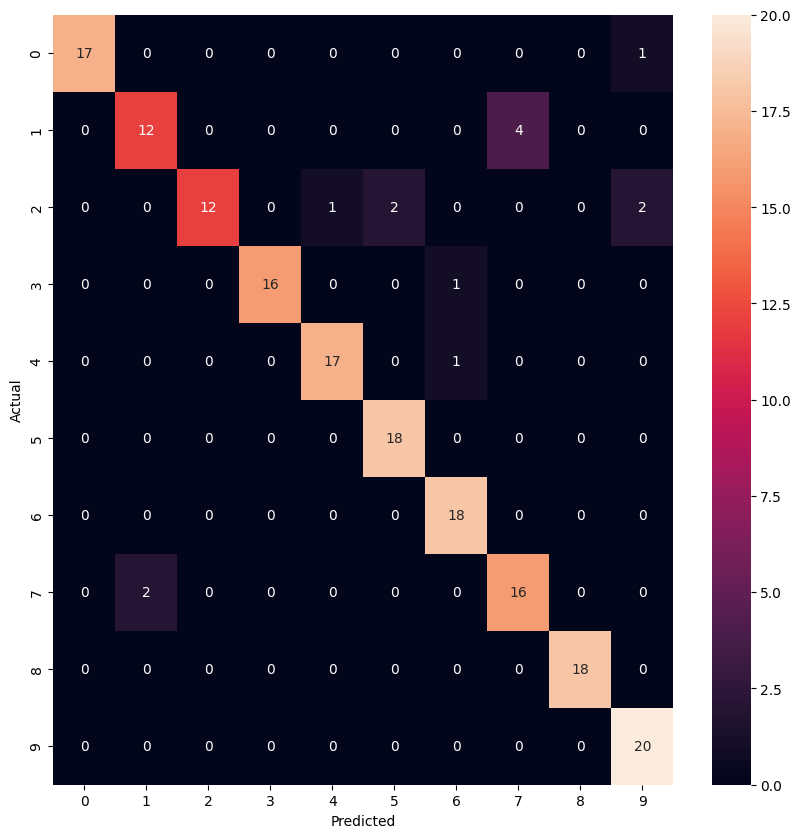

In [39]:
import seaborn as sn
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [40]:
# here we can see there are some errors
# we need to modify our nn, we add some layers in the above model and different activation function
# in 1st Dense layer,the input is 32 x 32 = 1024 neurons, which will give 10 output(numbers from 0 to 9)
# 2nd Dense layer,the input is 10 neurons from above layers output
# we can add more layers for accuracy
model2 = keras.Sequential([
 keras.layers.Flatten(),
 keras.layers.Dense(1024,input_shape=(1024,), activation='relu'),
 keras.layers.Dense(10, activation='softmax')
])
# compile the nn
model2.compile(optimizer='adam',
 loss='sparse_categorical_crossentropy',
 metrics=['accuracy']
 )
# train the model
# some 10 iterations done here
history = model2.fit(x_train_scaled, y_train,epochs= 10, validation_data=(x_test_scaled, y_test))

Epoch 1/10
32/32 [==============================] - 1s 15ms/step - loss: 1.2821 - accuracy: 0.6750 - val_loss: 0.5378 - val_accuracy: 0.8539
Epoch 2/10
32/32 [==============================] - 0s 14ms/step - loss: 0.2362 - accuracy: 0.9160 - val_loss: 0.3208 - val_accuracy: 0.9157
Epoch 3/10
32/32 [==============================] - 1s 16ms/step - loss: 0.1208 - accuracy: 0.9650 - val_loss: 0.2713 - val_accuracy: 0.9213
Epoch 4/10
32/32 [==============================] - 1s 18ms/step - loss: 0.0976 - accuracy: 0.9660 - val_loss: 0.3003 - val_accuracy: 0.9270
Epoch 5/10
32/32 [==============================] - 1s 17ms/step - loss: 0.0406 - accuracy: 0.9940 - val_loss: 0.3475 - val_accuracy: 0.9045
Epoch 6/10
32/32 [==============================] - 0s 11ms/step - loss: 0.0288 - accuracy: 0.9960 - val_loss: 0.2045 - val_accuracy: 0.9551
Epoch 7/10
32/32 [==============================] - 0s 10ms/step - loss: 0.0143 - accuracy: 1.0000 - val_loss: 0.2129 - val_accuracy: 0.9438
Epoch 8/10
32

In [41]:
# Observation : due to multiple layers the compiling will take more time to execute
# we also got amazing accuracy than earlier
# evaluate test dataset on modified model
model2.evaluate(x_test_scaled,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.2035 - accuracy: 0.9551


[0.20351125299930573, 0.9550561904907227]

In [42]:
# Earlier we got 0.9213483333587646 now we got 0.9606741666793823 accuracy
# redo the confusion matrix
# build confusion matrix to see how our prediction looks like
# convert to concrete values
y_predicted = model2.predict(x_test_scaled)
y_predicted[0]
y_predicted_labels=[np.argmax(i) for i in y_predicted]
print(y_predicted_labels, len(y_predicted_labels))
conf_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
conf_mat

6/6 [==============================] - 0s 3ms/step
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 7, 1, 1, 1, 1, 1, 7, 1, 7, 1, 1, 1, 1, 2, 9, 4, 2, 2, 2, 2, 2, 2, 2, 2, 5, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 1, 7, 7, 1, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9] 178


<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[18,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  3,  0,  0],
       [ 0,  0, 14,  0,  1,  1,  0,  0,  0,  1],
       [ 0,  0,  0, 17,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 18,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 18,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0, 16,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 20]], dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual')

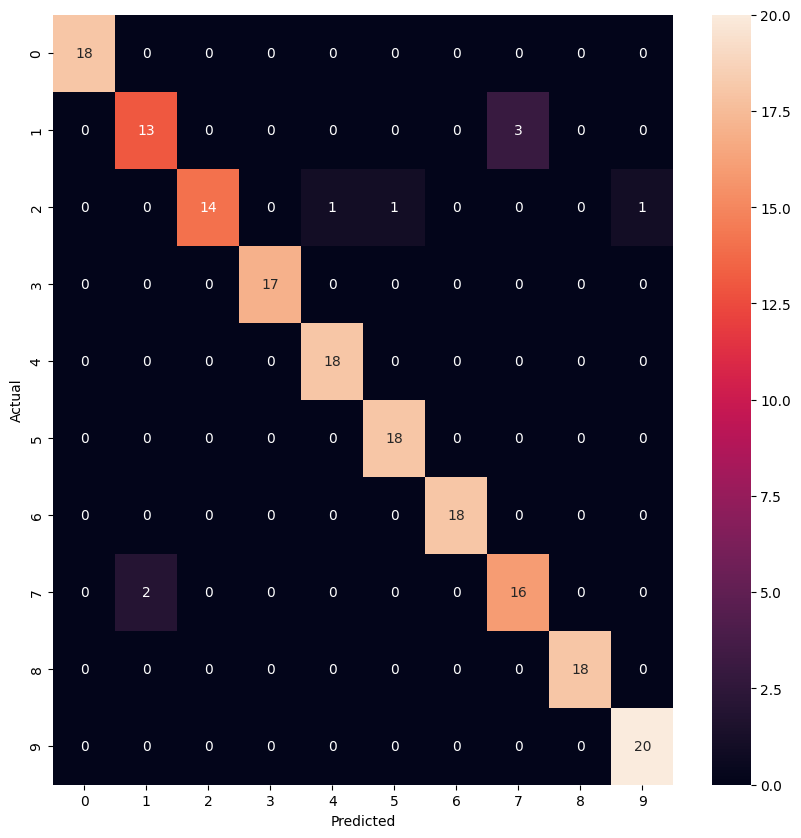

In [43]:
plt.figure(figsize = (10,10))
sn.heatmap(conf_mat,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

6/6 [==============================] - 0s 2ms/step - loss: 15.1470 - accuracy: 0.9157
Test accuracy: 0.915730357170105


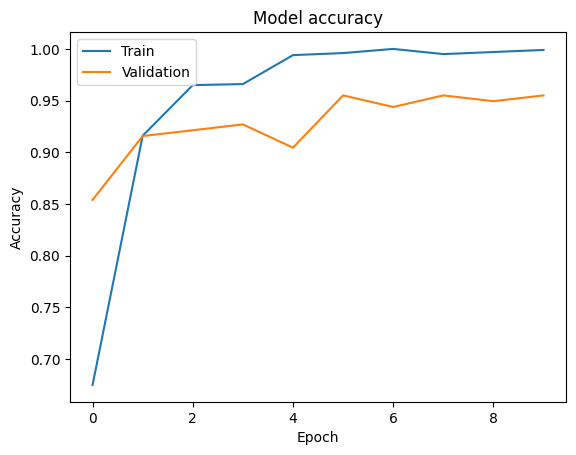

In [44]:
# Observatoin : we see in the updated model, there are less number of errors,
# whatever is not in diagonal is a error
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)
# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()